In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('../Datasets/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,house_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


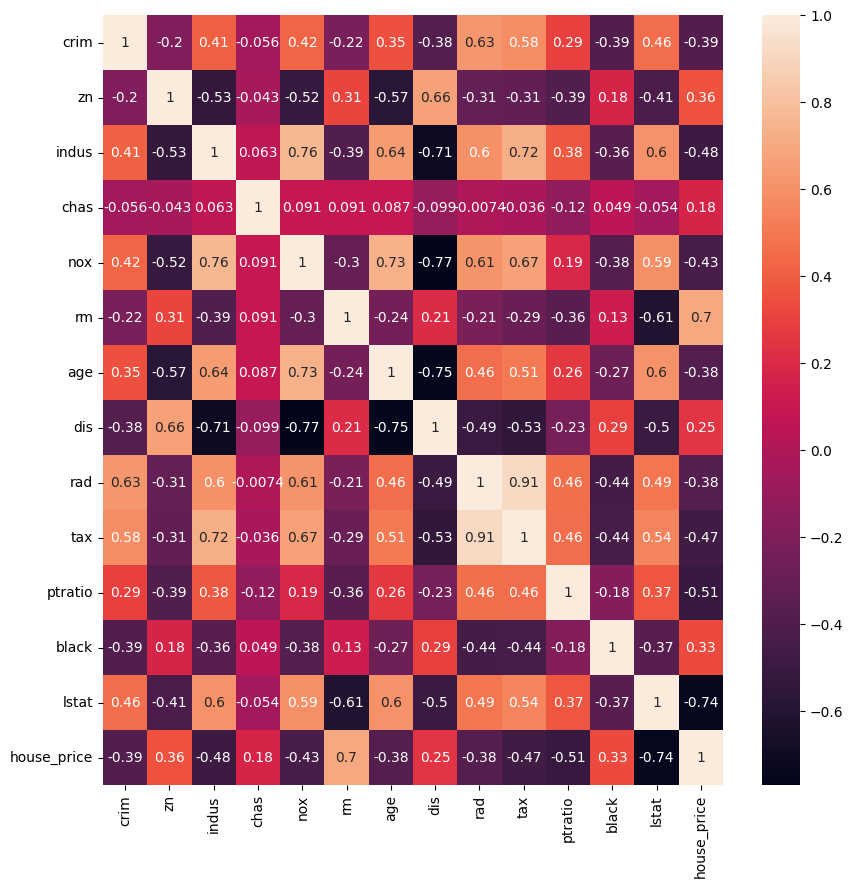

In [15]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
X = data.iloc[:, :-1]
y = data['house_price']

In [17]:
sc = StandardScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X), columns=X.columns)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
lr.score(X_test, y_test)*100

66.8759493535632

In [61]:
print(mean_absolute_error(y_test, lr.predict(X_test)))
print(mean_squared_error(y_test, lr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

3.1890919658878483
24.291119474973517
4.928602182665336


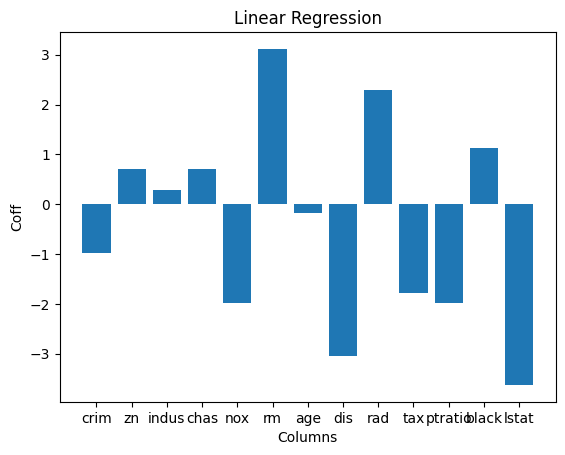

In [62]:
plt.bar(X.columns, lr.coef_)
plt.title('Linear Regression')
plt.xlabel('Columns')
plt.ylabel('Coff')
plt.show()

# Lasso

In [63]:
la = Lasso(alpha=0.001)
la.fit(X_train, y_train)

Lasso(alpha=0.001)

In [64]:
la.score(X_test, y_test)*100

66.87104601341603

In [65]:
print(mean_absolute_error(y_test, la.predict(X_test)))
print(mean_squared_error(y_test, la.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(X_test))))

3.188179322321913
24.29471527980465
4.928966958684613


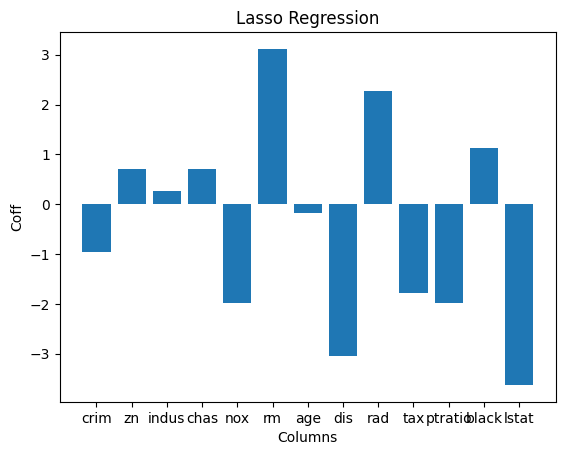

In [66]:
plt.bar(X.columns, la.coef_)
plt.title('Lasso Regression')
plt.xlabel('Columns')
plt.ylabel('Coff')
plt.show()

# Ridge

In [67]:
rl = Ridge(alpha=10)
rl.fit(X_train, y_train)

Ridge(alpha=10)

In [68]:
rl.score(X_test, y_test)*100

66.58059965255876

In [69]:
print(mean_absolute_error(y_test, rl.predict(X_test)))
print(mean_squared_error(y_test, rl.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, rl.predict(X_test))))

3.1736129003713502
24.50771058427278
4.95052629366543


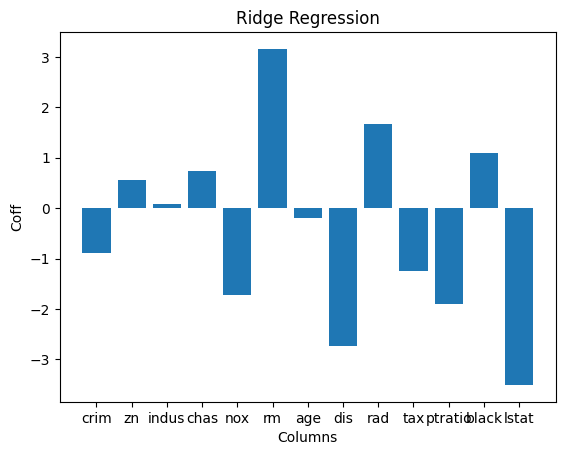

In [72]:
plt.bar(X.columns, rl.coef_)
plt.title('Ridge Regression')
plt.xlabel('Columns')
plt.ylabel('Coff')
plt.show()

In [74]:
df = pd.DataFrame({'col_name': X.columns, 'Linear Regression': lr.coef_, 'Ridge Regression': rl.coef_, 'Lasso Regression': la.coef_})

df

,col_name,Linear Regression,Ridge Regression,Lasso Regression
0,crim,-0.971494,-0.895069,-0.968845
1,zn,0.701556,0.553165,0.696498
2,indus,0.276752,0.080063,0.267644
3,chas,0.706532,0.735054,0.706694
4,nox,-1.991430,-1.731819,-1.985364
5,rm,3.115718,3.159946,3.116360
6,age,-0.177060,-0.185753,-0.174767
7,dis,-3.045771,-2.729280,-3.038895
8,rad,2.282785,1.672396,2.264323
9,tax,-1.792605,-1.252253,-1.774082
